# Heart Disease Prediction

## Preparation

### Import Library

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Choose Plot Style

In [6]:
plt.style.use('seaborn')

## Data Analysis

### Data Loading

In [7]:
missing_values = ["?", "--"]

In [8]:
data = pd.read_csv('/content/processed.cleveland.data', header = None, na_values = missing_values)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
data.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Data Information

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


Decryption on attributes from data source webpage: <br>
1. age - age in years <br>
2. sex - sex (1 = male; 0 = female) <br>
3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic) <br>
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
5. chol - serum cholestoral in mg/dl <br>
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false) <br>
7. restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy) <br>
8. thalach - maximum heart rate achieved <br>
9. exang - exercise induced angina (1 = yes; 0 = no) <br>
10. oldpeak - ST depression induced by exercise relative to rest <br>
11. slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping) <br>
12. ca - number of major vessels (0-3) colored by flourosopy <br>
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)

### Handle Missing Values

In [11]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [12]:
 data = data.dropna(axis = 0, how = 'any')

In [13]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### Change Data Value

In [16]:
data['num'].unique()

array([0, 2, 1, 3, 4])

In [17]:
for i in range(1,5):
  data['num'] = data['num'].replace(i, 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [18]:
data['num'].unique()

array([0, 1])

### Data Normalization

In [19]:
scaler = MinMaxScaler()

In [23]:
data.columns[:13]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [24]:
for i in data.columns[:13]:
  data[i] = scaler.fit_transform(data[[i]].to_numpy().reshape(-1, 1))
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,1
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,1
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0


## Data Visualization

### Pair Plot

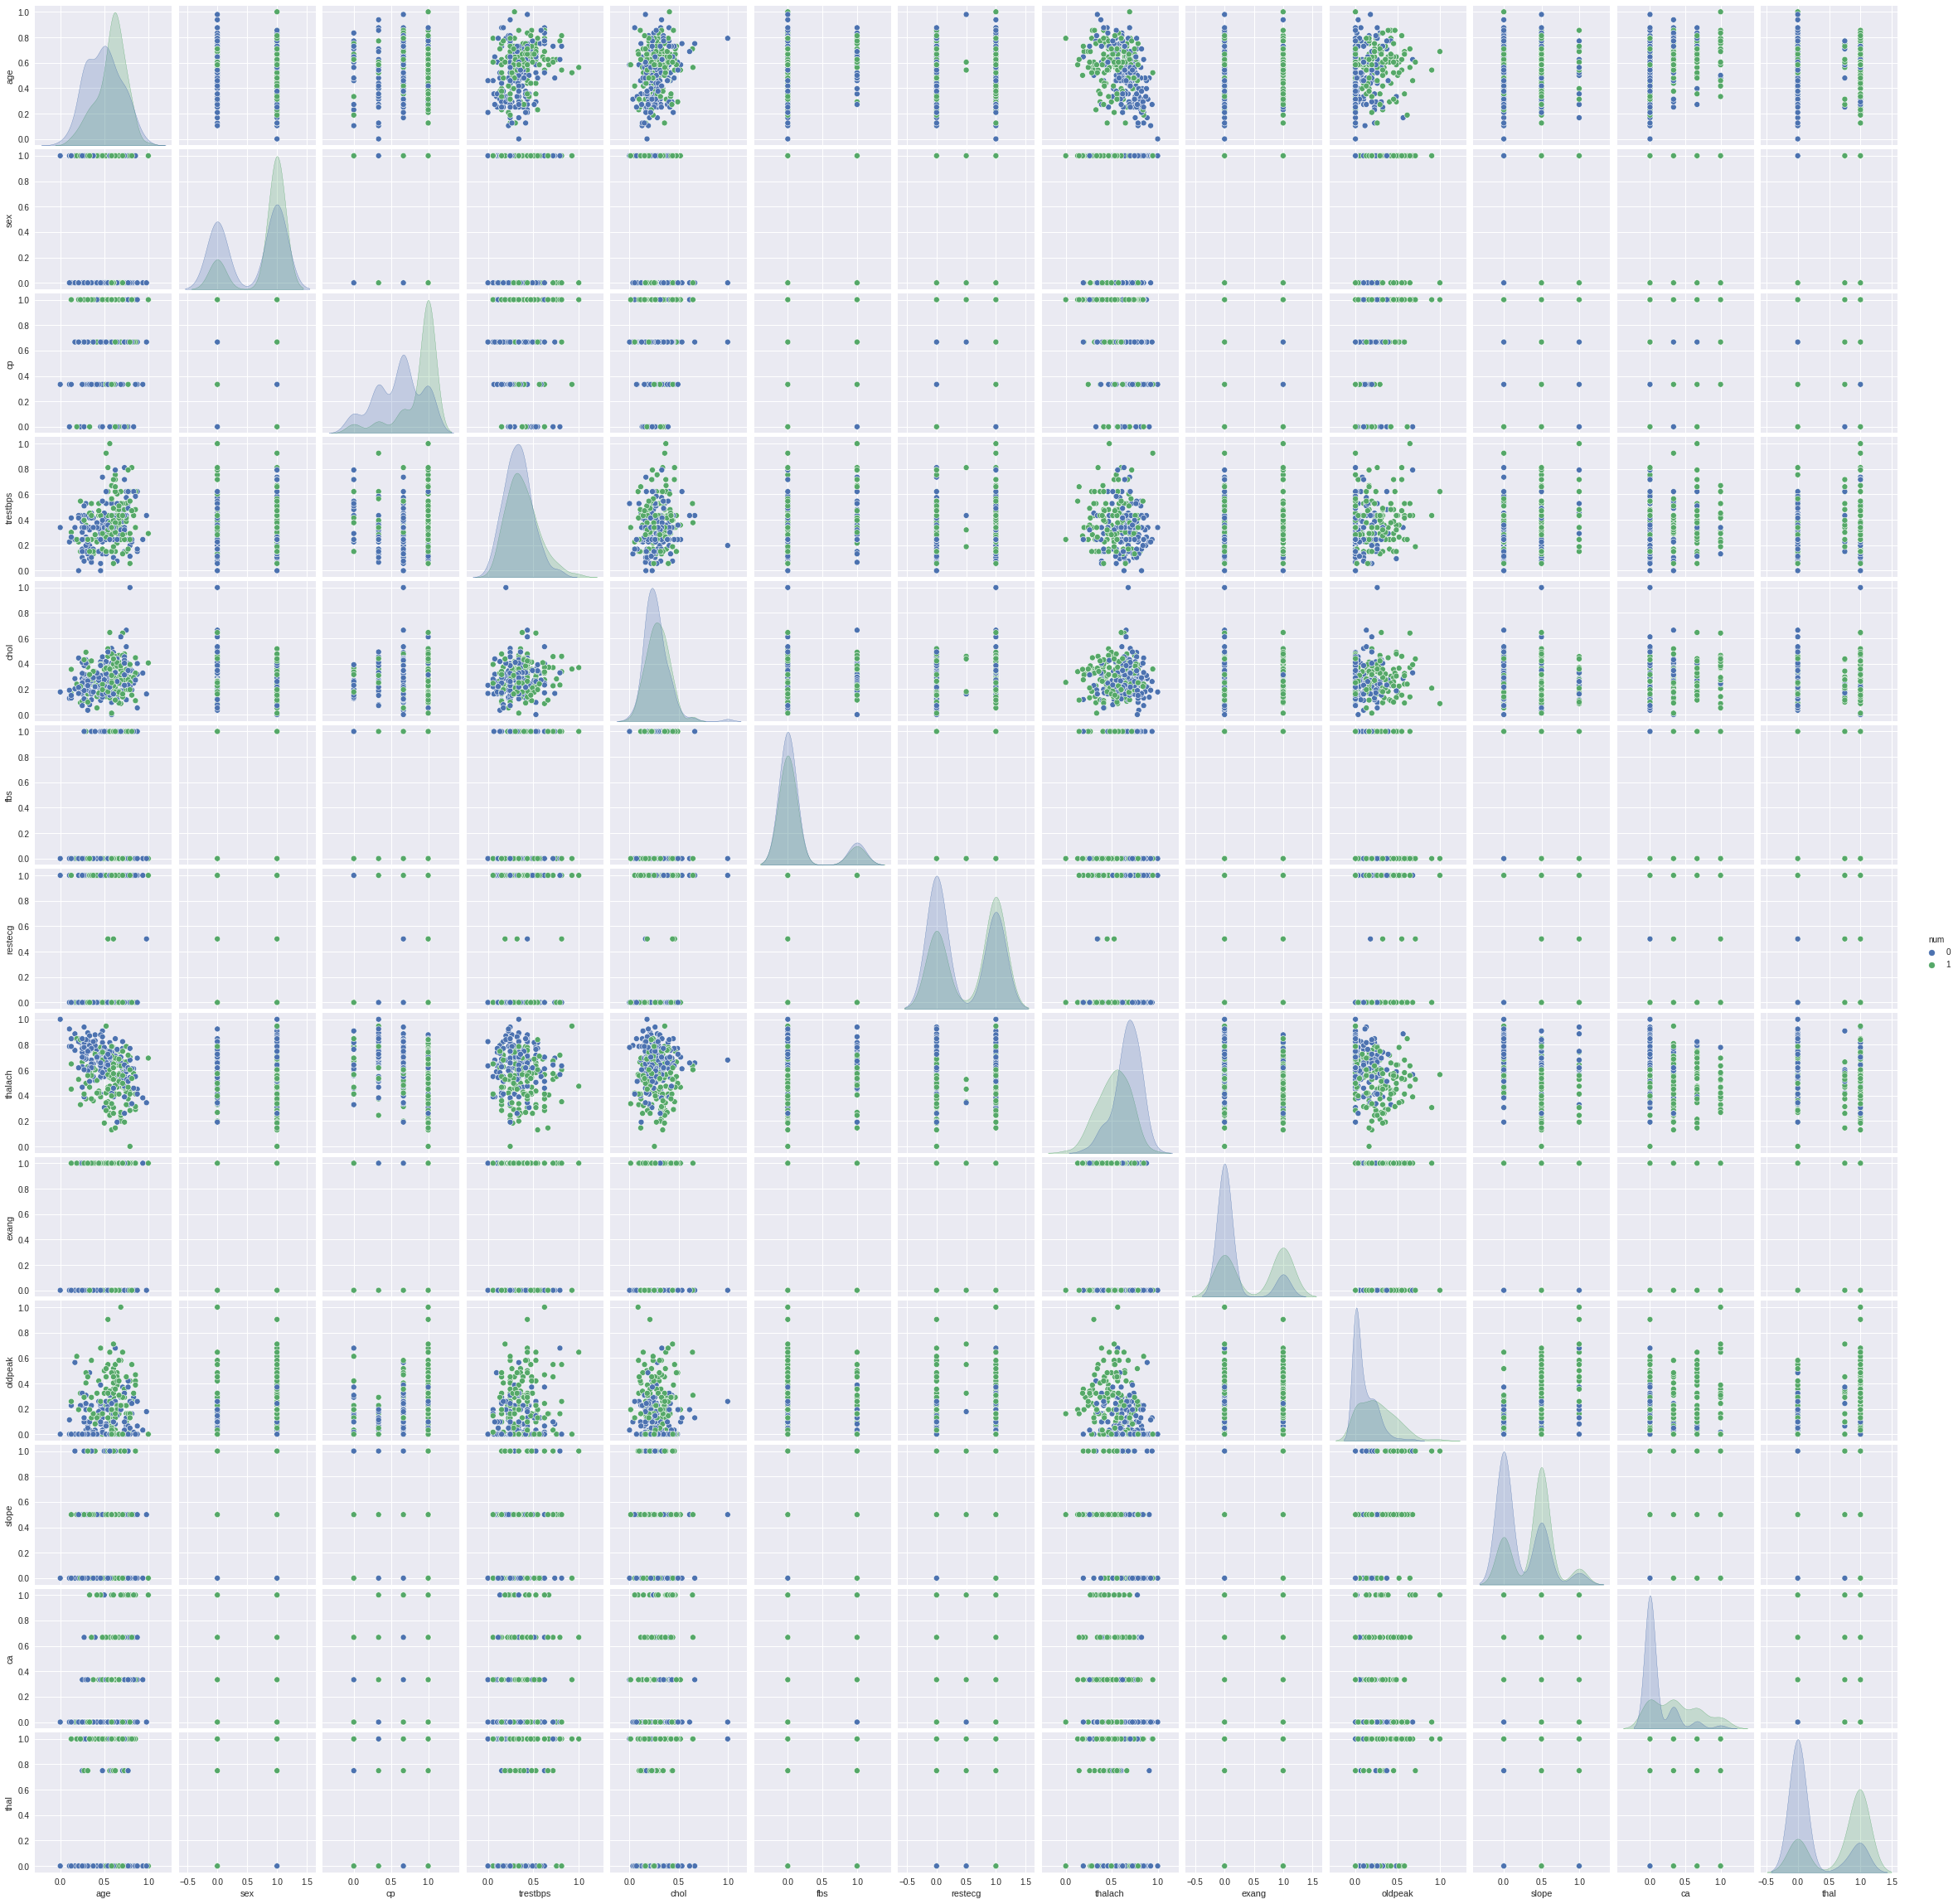

In [28]:
sns.pairplot(data = data, hue = 'num')

### Heat Map

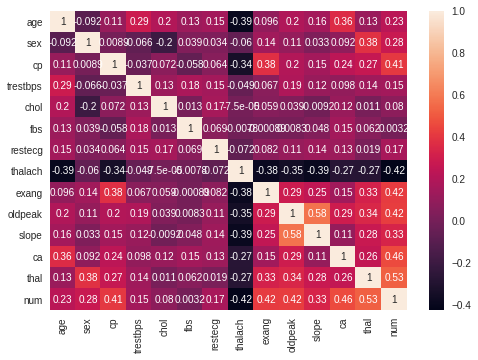

In [27]:
sns.heatmap(data = data.corr(), annot = True)

### BoxPlot

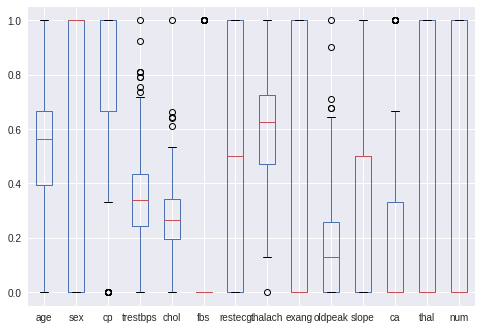

In [30]:
data.plot(kind = 'box')

## Split Dataset

In [35]:
features = data.values[:, :13]
labels = data.values[:, 13:]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

## Build Model

In [53]:
model = Sequential(name= 'Heart_Disease_Predictor')

In [54]:
model.add(Dense(
    input_dim = 13,
    units = 32, 
    activation = 'relu',
    kernel_initializer = 'he_uniform'
))

In [55]:
model.add(Dense(
    units = 16, 
    activation = 'relu'
))

In [56]:
model.add(Dense(
    units = 1, 
    activation = 'sigmoid'
))

Model Summary

In [57]:
model.summary()

Model: "Heart_Disease_Predictor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


## Compile Model

In [58]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

## 1) Eksperimen Epoch = 100, Batch Size = 32

In [59]:
training1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 0.6595 - accuracy: 0.5021 - val_loss: 0.6754 - val_accuracy: 0.5500
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6320 - accuracy: 0.5612 - val_loss: 0.6489 - val_accuracy: 0.6000
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6083 - accuracy: 0.6709 - val_loss: 0.6253 - val_accuracy: 0.6500
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5869 - accuracy: 0.7004 - val_loss: 0.6031 - val_accuracy: 0.7167
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5686 - accuracy: 0.7806 - val_loss: 0.5822 - val_accuracy: 0.7667
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5506 - accuracy: 0.8101 - val_loss: 0.5634 - val_accuracy: 0.7667
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5352 - accuracy: 0.8101 - val_loss: 0.5455 - val_accuracy: 0.8333
Epoch 8/100
8/8 [=========

In [61]:
_, final_train_acc = model.evaluate(X_train, y_train, verbose=0)
_, final_valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Valid Accuracy: %.3f' % (final_train_acc, final_valid_acc))

Train Accuracy: 0.873, Valid Accuracy: 0.850


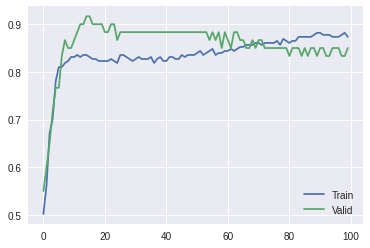

In [64]:
plt.plot(training1.history['accuracy'], label='Train')
plt.plot(training1.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

## 2) Eksperimen Epoch = 100, Batch Size = 1

In [83]:
model2 = Sequential(name= 'Heart_Disease_Predictor2')

In [84]:
model2.add(Dense(
    input_dim = 13,
    units = 32, 
    activation = 'relu',
    kernel_initializer = 'he_uniform'
))
model2.add(Dense(
    units = 16, 
    activation = 'relu'
))
model2.add(Dense(
    units = 1, 
    activation = 'sigmoid'
))

In [85]:
model2.summary()

Model: "Heart_Disease_Predictor2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [86]:
model2.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [87]:
training2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1, verbose=1)

Epoch 1/100
237/237 [==============================] - 1s 2ms/step - loss: 0.6336 - accuracy: 0.6414 - val_loss: 0.4914 - val_accuracy: 0.8333
Epoch 2/100
237/237 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7932 - val_loss: 0.4023 - val_accuracy: 0.8500
Epoch 3/100
237/237 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7890 - val_loss: 0.3648 - val_accuracy: 0.8500
Epoch 4/100
237/237 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8143 - val_loss: 0.3453 - val_accuracy: 0.8667
Epoch 5/100
237/237 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8312 - val_loss: 0.3422 - val_accuracy: 0.8667
Epoch 6/100
237/237 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8312 - val_loss: 0.3308 - val_accuracy: 0.8500
Epoch 7/100
237/237 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8354 - val_loss: 0.3300 - val_accuracy: 0.8667

In [88]:
_, final_train_acc = model2.evaluate(X_train, y_train, verbose=0)
_, final_valid_acc = model2.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Valid Accuracy: %.3f' % (final_train_acc, final_valid_acc))

Train Accuracy: 0.992, Valid Accuracy: 0.817


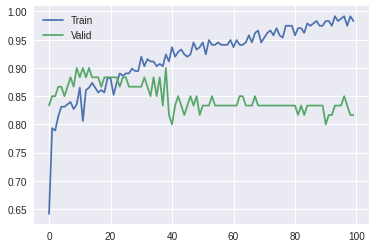

In [89]:
plt.plot(training2.history['accuracy'], label='Train')
plt.plot(training2.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

## 3) Eksperimen Epoch = 10, Batch Size = 32

In [97]:
model3 = Sequential(name= 'Heart_Disease_Predictor3')

In [98]:
model3.add(Dense(
    input_dim = 13,
    units = 32, 
    activation = 'relu',
    kernel_initializer = 'he_uniform'
))
model3.add(Dense(
    units = 16, 
    activation = 'relu'
))
model3.add(Dense(
    units = 1, 
    activation = 'sigmoid'
))

In [99]:
model3.summary()

Model: "Heart_Disease_Predictor3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_23 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [100]:
model3.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [101]:
training3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
8/8 [==============================] - 1s 22ms/step - loss: 0.7699 - accuracy: 0.4684 - val_loss: 0.7525 - val_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.7330 - accuracy: 0.4810 - val_loss: 0.7268 - val_accuracy: 0.5167
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.7071 - accuracy: 0.4726 - val_loss: 0.7043 - val_accuracy: 0.5167
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5274 - val_loss: 0.6818 - val_accuracy: 0.5333
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6695 - accuracy: 0.5612 - val_loss: 0.6604 - val_accuracy: 0.5333
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6497 - accuracy: 0.5738 - val_loss: 0.6382 - val_accuracy: 0.5500
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6305 - accuracy: 0.6203 - val_loss: 0.6144 - val_accuracy: 0.6667
Epoch 8/50
8/8 [=================

In [102]:
_, final_train_acc = model3.evaluate(X_train, y_train, verbose=0)
_, final_valid_acc = model3.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Valid Accuracy: %.3f' % (final_train_acc, final_valid_acc))

Train Accuracy: 0.865, Valid Accuracy: 0.867


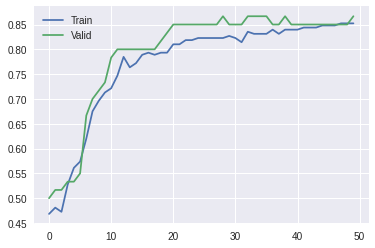

In [103]:
plt.plot(training3.history['accuracy'], label='Train')
plt.plot(training3.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

## 4) Eksperimen Epoch = 50, Batch Size = 1

In [111]:
model4 = Sequential(name= 'Heart_Disease_Predictor4')

In [112]:
model4.add(Dense(
    input_dim = 13,
    units = 32, 
    activation = 'relu',
    kernel_initializer = 'he_uniform'
))
model4.add(Dense(
    units = 16, 
    activation = 'relu'
))
model4.add(Dense(
    units = 1, 
    activation = 'sigmoid'
))

In [113]:
model4.summary()

Model: "Heart_Disease_Predictor4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_29 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [114]:
model4.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [115]:
training4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1, verbose=1)

Epoch 1/50
237/237 [==============================] - 1s 2ms/step - loss: 0.6043 - accuracy: 0.6793 - val_loss: 0.4913 - val_accuracy: 0.8667
Epoch 2/50
237/237 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7975 - val_loss: 0.4137 - val_accuracy: 0.9000
Epoch 3/50
237/237 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.8143 - val_loss: 0.3418 - val_accuracy: 0.9167
Epoch 4/50
237/237 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8312 - val_loss: 0.3131 - val_accuracy: 0.9167
Epoch 5/50
237/237 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8312 - val_loss: 0.2896 - val_accuracy: 0.9000
Epoch 6/50
237/237 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8270 - val_loss: 0.2826 - val_accuracy: 0.9333
Epoch 7/50
237/237 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8228 - val_loss: 0.2821 - val_accuracy: 0.9167
Epoch 

In [116]:
_, final_train_acc = model4.evaluate(X_train, y_train, verbose=0)
_, final_valid_acc = model4.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Valid Accuracy: %.3f' % (final_train_acc, final_valid_acc))

Train Accuracy: 0.932, Valid Accuracy: 0.867


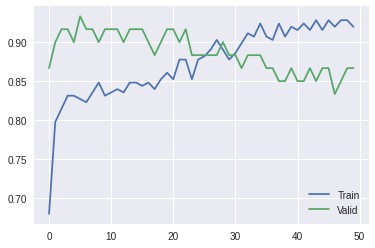

In [117]:
plt.plot(training4.history['accuracy'], label='Train')
plt.plot(training4.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

## Analisis dan Kesimpulan

Pada eksperimen pertama, dengan batch size = 32 dan epoch = 100, diperoleh model yang agak overfit, dengan akurasi yang cukup bagus di atas 80%

Pada eksperimen kedua, dengan batch size = 1 dan epoch = 100, diperoleh model yang overfit, dengan akurasi training dan validasi berbeda jauh

Menurunkan jumlah epoch pada eksperimen ketiga dengan epoch = 50 dan batch size = 32 membuat model optimal dengan perbedaan akurasi training dan validasi sangat kecil

Meskipun demikian, ketika batch size diperkecil menjadi batch size = 1, dan epoch dibuat sama, model menjadi kembali overfit

Dari empat eksperimen ini dapat disimpulkan dua hal:
1. Menambah jumlah batch size akan mempercepat waktu training, tetapi jumlah epoch untuk menacapai model optimal (tidak underfit) menjadi lebih besar <br>
2. Menambah jumlah epoch akan membuat model lebih akurat, tetapi dengan kehati-hatian. Jumlah epoch terlalu sedikit akan menyebabkan model underfit, sementara jumlah terlalu besar akan menyebabkan model overfit